

- BfS, Ständige Wohnbevölkerung nach Staatsangehörigkeitskategorie, Alter und Kanton, 3. Quartal 2019 ([Link](https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken/tabellen.assetdetail.11027458.html))


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-and-Clean-Data" data-toc-modified-id="Load-and-Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Clean Data</a></span><ul class="toc-item"><li><span><a href="#Request-data-from-API" data-toc-modified-id="Request-data-from-API-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Request data from API</a></span></li><li><span><a href="#Transform-to-tabular-format-(Pandas-DataFrame)-and-explore" data-toc-modified-id="Transform-to-tabular-format-(Pandas-DataFrame)-and-explore-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Transform to tabular format (Pandas DataFrame) and explore</a></span></li><li><span><a href="#Clean-data,-Pt.1" data-toc-modified-id="Clean-data,-Pt.1-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Clean data, Pt.1</a></span></li><li><span><a href="#Clean-data,-Pt.-2---Advanced" data-toc-modified-id="Clean-data,-Pt.-2---Advanced-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Clean data, Pt. 2 - <em>Advanced</em></a></span></li></ul></li><li><span><a href="#Manipulate-data-(group-by,-slicing)" data-toc-modified-id="Manipulate-data-(group-by,-slicing)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manipulate data (group by, slicing)</a></span><ul class="toc-item"><li><span><a href="#Group-by" data-toc-modified-id="Group-by-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Group by</a></span></li><li><span><a href="#Slice-(on-col-values,-without-using-the-index)" data-toc-modified-id="Slice-(on-col-values,-without-using-the-index)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Slice (on col values, without using the index)</a></span></li></ul></li><li><span><a href="#Visualize-data-with-interactive-plots" data-toc-modified-id="Visualize-data-with-interactive-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize data with interactive plots</a></span><ul class="toc-item"><li><span><a href="#Total-CumSums-(Line)" data-toc-modified-id="Total-CumSums-(Line)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Total CumSums (Line)</a></span></li><li><span><a href="#Newly-confirmed-cases-by-day-(Bar)" data-toc-modified-id="Newly-confirmed-cases-by-day-(Bar)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Newly confirmed cases by day (Bar)</a></span></li><li><span><a href="#Including-Population-Statistics-(Scatter)" data-toc-modified-id="Including-Population-Statistics-(Scatter)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Including Population Statistics (Scatter)</a></span></li><li><span><a href="#Geo-Plots" data-toc-modified-id="Geo-Plots-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Geo-Plots</a></span></li></ul></li></ul></div>

## Import libraries

In [35]:
import numpy as np
import pandas as pd
import requests
from pprint import pprint

# Visualization - static plots
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# # Standard plotly imports
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# # Using plotly + cufflinks in offline mode
# import cufflinks
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)

## Load and Clean Data

### Request data from API
- Documentation on the [Covid19-RestAPI](https://github.com/apfeuti/covid19-rest) (A. Pfeuti)
- Documentation on the [data structure](https://github.com/openZH/covid_19) (OpenZH)
- [Documentation](https://requests.readthedocs.io/en/master/) and [tutorial / guide](https://realpython.com/python-requests/) on the requests library

In [2]:
# Scrape all data for country Switzerland using the requests library

url = "https://covid19-rest.herokuapp.com/api/openzh/v1/country/CH"
r = requests.get(url)  # Returns a 'response' object with content of type JSON

# Check main elements of returned JSON file
print(r.json().keys())

dict_keys(['totals', 'records'])


The `totals` element contains the cumulated value for the whole country & daterange

In [3]:
# Output totals
pprint(r.json()["totals"])

{'ncumul_ICU': 310,
 'ncumul_conf': 15922,
 'ncumul_deceased': 359,
 'ncumul_hosp': 1953,
 'ncumul_released': 753,
 'ncumul_tested': 0,
 'ncumul_vent': 218}


The `records` element contains the individual records per canton and day

In [4]:
# Print number of records, first and last record, daterange
print(f"Total # of records: {len(r.json()['records'])}\n")
pprint(r.json()["records"][0])
print("\n")
pprint(r.json()["records"][-1])
print("\n")
print(f"(Approximate) Daterange from {r.json()['records'][0]['date']} to {r.json()['records'][-1]['date']}")

Total # of records: 483

{'abbreviation_canton_and_fl': 'AG',
 'date': '2020-02-28',
 'ncumul_ICU': '',
 'ncumul_conf': 1,
 'ncumul_deceased': '',
 'ncumul_hosp': '',
 'ncumul_released': '',
 'ncumul_tested': '',
 'ncumul_vent': '',
 'source': 'https://www.ag.ch/media/kanton_aargau/themen_1/coronavirus_1/20200228_KFS_20200106_Coronavirus_Lagebulletin_AG_Unterschrieben.pdf',
 'time': '15:00'}


{'TotalCured': '',
 'TotalPosTests1': '',
 'abbreviation_canton_and_fl': 'ZH',
 'date': '2020-03-30',
 'ncumul_ICU': '',
 'ncumul_conf': 1874,
 'ncumul_deceased': 21,
 'ncumul_hosp': 199,
 'ncumul_released': '',
 'ncumul_tested': '',
 'ncumul_vent': 47,
 'source': 'https://gd.zh.ch/internet/gesundheitsdirektion/de/themen/coronavirus.html#title-content-internet-gesundheitsdirektion-de-themen-coronavirus-jcr-content-contentPar-textimage_7',
 'time': '17:00'}


(Approximate) Daterange from 2020-02-28 to 2020-03-30


### Transform to tabular format (Pandas DataFrame) and explore

 - Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/) including User Guide / Getting Started

In [5]:
# Note that you do not need the pd.read_json() method because this is not a file or a string containing json 
covid_raw = pd.DataFrame(r.json()["records"])

In [6]:
# Print first 5 rows of DataFrame
display(covid_raw.head())

,TotalCured,TotalPosTests1,abbreviation_canton_and_fl,date,ncumul_ICF,ncumul_ICU,ncumul_conf,ncumul_deceased,ncumul_deceased_suspect,ncumul_hosp,ncumul_released,ncumul_tested,ncumul_vent,ninst_ICU_intub,source,time
0,NaN,NaN,AG,2020-02-28,NaN,,1,,NaN,,,,,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
1,NaN,NaN,AG,2020-03-02,NaN,,2,,NaN,,,,,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,18:00
2,NaN,NaN,AG,2020-03-03,NaN,,6,,NaN,,,,,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
3,NaN,NaN,AG,2020-03-04,NaN,,7,,NaN,,,,,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00
4,NaN,NaN,AG,2020-03-05,NaN,,9,,NaN,,,,,NaN,https://www.ag.ch/media/kanton_aargau/themen_1...,15:00


In [7]:
# Print summary on DataFrame
display(covid_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 16 columns):
TotalCured                    26 non-null object
TotalPosTests1                61 non-null object
abbreviation_canton_and_fl    483 non-null object
date                          483 non-null object
ncumul_ICF                    35 non-null float64
ncumul_ICU                    483 non-null object
ncumul_conf                   483 non-null object
ncumul_deceased               483 non-null object
ncumul_deceased_suspect       35 non-null object
ncumul_hosp                   483 non-null object
ncumul_released               483 non-null object
ncumul_tested                 483 non-null object
ncumul_vent                   483 non-null object
ninst_ICU_intub               70 non-null object
source                        483 non-null object
time                          483 non-null object
dtypes: float64(1), object(15)
memory usage: 60.5+ KB


None

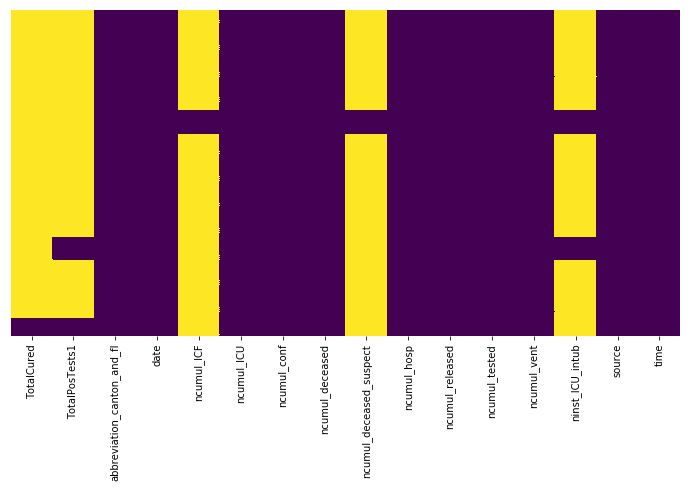

In [8]:
# Visualize the missing data (to get a better feeling)
plt.figure(figsize=(12,6))
sns.heatmap(covid_raw.isnull(), yticklabels=False, cbar=False, cmap='viridis');

**Findings:** There are some issues with this dataframe. 
- Remove cols with many missing values ["TotalCured", "TotalPosTests1", "ncumul_ICF", "ncumul_dceased_suspect", "ninst_ICU_intub"]
- Remove additional cols we don't need for our analysis ["ncumul_ICU", "ncumul_vent", "source", "time"]
- Rename "abbrevation_catnon_and_fl" to "canton"
- Replace "" with "0" (for example in deceased column)
- Change type of "date" from oject to datetime
- Change type of other columns from object to int

### Clean data, Pt.1 

In [9]:
# Perform the defined cleaning steps

# Create a copy of the raw df with only the desired columns
covid_clean = covid_raw[["abbreviation_canton_and_fl",
                      "date",
                      "ncumul_conf",
                      "ncumul_hosp",
                      "ncumul_deceased",
                      "ncumul_released"]].copy()

# Rename column
covid_clean.rename(columns={"abbreviation_canton_and_fl": "canton"}, inplace=True)

# Replace empty cell values with value "0"
covid_clean.replace("", "0", inplace=True)

# Change date datatype
covid_clean["date"] = pd.to_datetime(covid_clean["date"], format="%Y-%m-%d")

# Change datatypes for other columns in a "for loop"
for col in covid_clean.columns.drop(["canton", "date"]):
    covid_clean[col] = covid_clean[col].astype(int)
    
# Make some checks (assertions)
assert covid_clean.isnull().sum().sum() == 0, "Missing values left"
assert list(covid_clean.dtypes) == ["object", "<M8[ns]", "int32", "int32", "int32", "int32"], "Wrong datatpyes"

In [10]:
# Check results (first 5 rows)
display(covid_clean.head())

,canton,date,ncumul_conf,ncumul_hosp,ncumul_deceased,ncumul_released
0,AG,2020-02-28,1,0,0,0
1,AG,2020-03-02,2,0,0,0
2,AG,2020-03-03,6,0,0,0
3,AG,2020-03-04,7,0,0,0
4,AG,2020-03-05,9,0,0,0


### Clean data, Pt. 2 - _Advanced_

There is one major other issue with this dataframe. By the time of writing this notebook we have 464 rows in the dataframe. But the counts started 32 days ago and we have 26 cantons --> 832 rows ... On many days there is no data for some of the cantons. This has to be fixed:

- Expand dataframe to include one row / day per canton
- If date is missing for one day, forward-fill with data from previous day

In [11]:
# Exlplore counts for some sample days to illustrate the problem
covid_clean["date"].value_counts().sample(5).sort_index(ascending=False)

2020-03-23    22
2020-03-14    11
2020-03-13    13
2020-03-09    11
2020-03-04    12
Name: date, dtype: int64

In [12]:
# Look at the canton with the fewest data entries
min_canton = covid_clean["canton"].value_counts().tail(1).index[0]
covid_clean.loc[covid_clean["canton"] == min_canton]


,canton,date,ncumul_conf,ncumul_hosp,ncumul_deceased,ncumul_released
269,OW,2020-03-13,1,0,0,0
270,OW,2020-03-23,25,0,0,0
271,OW,2020-03-24,25,0,0,0
272,OW,2020-03-25,27,0,0,0
273,OW,2020-03-26,30,0,0,0
274,OW,2020-03-27,37,0,0,0
275,OW,2020-03-30,46,0,0,0


Let's fix that!

In [13]:
# Create a list (DatetimeIndex) with all dates for the whole daterange
all_days = pd.date_range(covid_clean["date"].min(), covid_clean["date"].max(), freq='D')
print(all_days[:10])

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05'],
              dtype='datetime64[ns]', freq='D')


In [14]:
# Define function for the expansion

def expand_dates(df, all_days):
    # Get canton abbrevation for later filling
    canton_abbr = df["canton"].max()
    # Set original date column to index
    df.set_index("date", inplace=True)
    # Expand by setting 'all_days' as new index
    df = df.reindex(all_days)
    # Fill missing values with previous day's number
    df.fillna(method='pad', inplace=True)
    # Set missing values in canton col to abbreviation
    df["canton"] = canton_abbr
    # Set missing values at the start to zero
    df.fillna(value=0, inplace=True)
    # Reset index, move dates to col
    df.reset_index(inplace=True)
    df.rename(columns={"index": "date"}, inplace=True)
    # Reset numeric columns to int
    for col in df.columns[2:]:
        df[col] = df[col].astype(int)
    
    return df

In [15]:
# Demonstrate result of function for OW
expand_dates(covid_clean.loc[covid_clean["canton"] == min_canton], all_days)

,date,canton,ncumul_conf,ncumul_hosp,ncumul_deceased,ncumul_released
0,2020-02-25,OW,0,0,0,0
1,2020-02-26,OW,0,0,0,0
2,2020-02-27,OW,0,0,0,0
3,2020-02-28,OW,0,0,0,0
4,2020-02-29,OW,0,0,0,0
5,2020-03-01,OW,0,0,0,0
6,2020-03-02,OW,0,0,0,0
7,2020-03-03,OW,0,0,0,0
8,2020-03-04,OW,0,0,0,0
9,2020-03-05,OW,0,0,0,0


In [16]:
# Run function for all cantons in original df and concatenate them to a new expanded df

# Create new, empty DataFrame with same columns as the existing one
covid = pd.DataFrame(columns=covid_clean.columns)

# Loop through the cantons, run the function and concat to new df
for canton in covid_clean["canton"].unique():
    # Subset to canton rows only
    df = covid_clean.loc[covid_clean["canton"] == canton]
    # Run expansion function
    df = expand_dates(df, all_days)
    # Append result to the new dataframe
    covid = pd.concat([covid, df], ignore_index=True, sort=True)

In [17]:
# Check results
display(covid.info())
display(covid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 6 columns):
canton             910 non-null object
date               910 non-null datetime64[ns]
ncumul_conf        910 non-null object
ncumul_deceased    910 non-null object
ncumul_hosp        910 non-null object
ncumul_released    910 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 42.7+ KB


None

,canton,date,ncumul_conf,ncumul_deceased,ncumul_hosp,ncumul_released
0,AG,2020-02-25,0,0,0,0
1,AG,2020-02-26,0,0,0,0
2,AG,2020-02-27,0,0,0,0
3,AG,2020-02-28,1,0,0,0
4,AG,2020-02-29,1,0,0,0


## Manipulate data (group by, slicing)
### Group by

- [Tutorial](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm) on groupby in Pandas

In [18]:
# Create a groupby object by canton, aggregate to return actual values for all columns
covid_by_canton = covid.groupby("canton").agg(max)
# Create a DataFrame
covid_by_canton = pd.DataFrame(covid_by_canton)

In [19]:
# Check results
display(covid_by_canton.head())

,date,ncumul_conf,ncumul_deceased,ncumul_hosp,ncumul_released
canton,,,,,
AG,2020-03-30,481,8,94,4
AI,2020-03-30,14,0,1,0
AR,2020-03-30,50,2,7,0
BE,2020-03-30,826,13,112,0
BL,2020-03-30,539,7,0,0


In [20]:
# Group by date
covid_by_date = pd.DataFrame(covid.groupby("date").agg(sum))
covid_by_date.drop("canton", axis=1, inplace=True)  # Sum of str is useless ;-)

In [21]:
# Check results (last five rows) - Note, the canton row was removed automatically
display(covid_by_date.tail())

,ncumul_conf,ncumul_deceased,ncumul_hosp,ncumul_released
date,,,,
2020-03-26,12257,221,1408,474
2020-03-27,13483,247,1564,571
2020-03-28,14495,283,1672,627
2020-03-29,15195,316,1739,678
2020-03-30,15922,359,1953,753


### Slice (on col values, without using the index)

- [Guide](https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/) on Indexing, Slicing and Subsetting DataFrames in Python

In [23]:
# Remember covid dataframe structure
display(covid.head(1))

,canton,date,ncumul_conf,ncumul_deceased,ncumul_hosp,ncumul_released
0,AG,2020-02-25,0,0,0,0


In [24]:
# Create a dataframe for data from canton Zurich
covid_zh = covid.loc[covid["canton"] == "ZH"]
print(f"# rows for Zurich: {len(covid_zh)}.")

# Create a dataframe with data for date 20-03-30
covid_mrz = covid.loc[covid["date"] == "2020-03-30"]
print(f"# rows for Mar, 20th: {len(covid_mrz)}.")

# rows for Zurich: 35.
# rows for Mar, 20th: 26.


## Visualize data with interactive plots

### Total CumSums (Line)

In [46]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"  # for offline usage, with overhead ("notebook_connected" is better if you are online)
pio.templates.default = "plotly_dark"
# py.init_notebook_mode(connected=False)  # alternative?

import cufflinks as cf
cf.set_config_file(theme="solar", offline=True)

In [70]:
fig = covid_by_date.iplot(kind="line",
                          asFigure=True, 
                          xTitle="Days",
                          yTitle="Cumulated Figures",
                          title="Cumulated Figures Over Time",
                          )
fig.show()

In [69]:
fig = covid_by_date.iplot(kind="line",
                          asFigure=True,
                          )

fig.layout = dict(
    xaxis=dict(title='Days'),
    yaxis=dict(title='Cumulated Figures', type='log'),
    title='Cumulated Figures Over Time On Log Axis')

fig.show()

### Newly confirmed cases by day (Bar)

In [62]:
# Create a new dataframe containing the confirmed cases by day

# Reduce original frame to conf value
conf_by_day = covid_by_date[["ncumul_conf"]]
# Create a second col containing the difference between acutal and day before
conf_by_day["daily"] = (conf_by_day["ncumul_conf"] - conf_by_day["ncumul_conf"].shift(1))
# Set first value of new col (it is NaN) to actual value
conf_by_day.iloc[0, 1] = conf_by_day.iloc[0, 0]
# Change datatype to int
conf_by_day["daily"] = conf_by_day["daily"].astype(int)

In [64]:
# Check result
conf_by_day.head(3)

,ncumul_conf,daily
date,,
2020-02-25,1,1
2020-02-26,1,0
2020-02-27,2,1


In [125]:
fig = conf_by_day["daily"].iplot(kind="bar",
                          asFigure=True, 
                          xTitle="The X Axis",
                          yTitle="The Y Axis",
                          title="The Figure Title")
fig.show()

### Including Population Statistics (Scatter)

In [74]:
# Load population statistics
statistics = pd.read_excel("data/bev_kantone_Q3_19.xlsx", sep=",")
# Check data
statistics.head()

,Kanton,Total,0-19 Jahre,20-64 Jahre,65 Jahre und mehr
0,VD,801557,174634,493776,133147
1,VS,344059,67537,207961,68561
2,GE,502999,105605,314736,82658
3,BE,1038992,197161,623310,218521
4,FR,320753,71145,198382,51226


**Let's create a DataFrame to plot:**
- Confirmed Cases vs. population size
- Hospitalization rate vs. % of population 65 years and over


In [110]:
# Merge statistics and covid_by_canton
covid_stats = pd.merge(statistics, covid_by_canton, left_on="Kanton", right_on="canton")
# Calculate necessary stats
covid_stats["pct_65_older"] = covid_stats["65 Jahre und mehr"] / covid_stats["Total"]
covid_stats["pct_hosp"] = covid_stats["ncumul_hosp"] / covid_stats["ncumul_conf"]
# # Drop cols we don't need
covid_stats.drop(["0-19 Jahre", "20-64 Jahre", "date", "ncumul_released",
                  "65 Jahre und mehr"], axis=1, inplace=True)

In [111]:
# Check results
covid_stats.head(3)

,Kanton,Total,ncumul_conf,ncumul_deceased,ncumul_hosp,pct_65_older,pct_hosp
0,VD,801557,3168,66,390,0.166110,0.123106
1,VS,344059,1000,26,122,0.199271,0.122000
2,GE,502999,2375,42,382,0.164330,0.160842


In [127]:
covid_stats.iplot(kind='scatter', 
                  mode='markers',
                  x='ncumul_conf',
                  y='Total',
                  categories='Kanton',
                  size = 20,
                  opacity=0.8,
#                   bestfit=True,  # does not return a trend line
#                   bestfit_colors=['white'],
                  xTitle='Confirmed Cases',
                  yTitle='Population Size',
                  title='Confirmed Cases by Population Size')

In [142]:
covid_stats.iplot(kind='bubble', 
                  mode='markers',
                  x='pct_hosp',
                  y='pct_65_older',
                  categories='Kanton',
                  # Add 3rd dimension, kind has to be "bubble"
                  size='ncumul_deceased',
                  opacity=0.8,
                  # Add 3rd dimension to hover info
                  text="ncumul_deceased",
                  hoverinfo='text',
                  xTitle='Hospitalization Rate',
                  yTitle='Pct 65 and older',
                  title='Hospitalization Rate by Pct 65 and older (Size = # Deceased)'
                  )

# check this for hover formatting: https://plotly.com/python/hover-text-and-formatting/

### Geo-Plots